In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('electronic_goods_dataset.csv')
df.head()

,product_id,product_name,brand,weight,demand,competitor_price,seasonality,discount_percentage,base_price
0,1,Product_1,Brand C,5.097043,967,62.092661,0.322467,0.012280,4864.703359
1,2,Product_2,Brand A,3.338100,803,35.604359,-0.223067,0.014898,4073.099040
2,3,Product_3,Brand C,5.540914,118,51.805832,0.696731,0.187056,638.139201
3,4,Product_4,Brand C,4.899524,531,51.452387,0.989074,0.018932,2691.117755
4,5,Product_5,Brand A,4.522104,784,43.807635,0.988681,0.097383,3985.269590


In [31]:
df.drop(['product_id', 'product_name'], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                1000 non-null   object 
 1   weight               1000 non-null   float64
 2   demand               1000 non-null   int64  
 3   competitor_price     1000 non-null   float64
 4   seasonality          1000 non-null   float64
 5   discount_percentage  900 non-null    float64
 6   base_price           1000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [33]:
df.describe()

,weight,demand,competitor_price,seasonality,discount_percentage,base_price
count,1000.000000,1000.000000,1000.000000,1000.000000,900.000000,1000.000000
mean,5.142367,572.640000,50.609845,-0.034085,0.147288,2910.804315
std,1.983477,253.411479,10.065176,0.990409,0.088371,1267.233565
min,-0.792511,100.000000,16.131862,-3.339500,0.000188,479.688638
25%,3.835940,361.000000,43.624733,-0.740428,0.071033,1872.304742
50%,5.124105,585.000000,51.084287,-0.024690,0.145557,2977.839872
75%,6.415682,778.250000,57.577235,0.696795,0.224294,3957.764314
max,10.264764,998.000000,84.958778,2.920753,0.299715,5069.451927


In [34]:
df.isnull().sum().sum()

100

In [35]:
df.columns[df.isnull().any()].tolist()

['discount_percentage']

In [36]:
df['discount_percentage'].fillna(df['discount_percentage'].mean(), inplace=True)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df = pd.get_dummies(df, columns=['brand'])

In [45]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

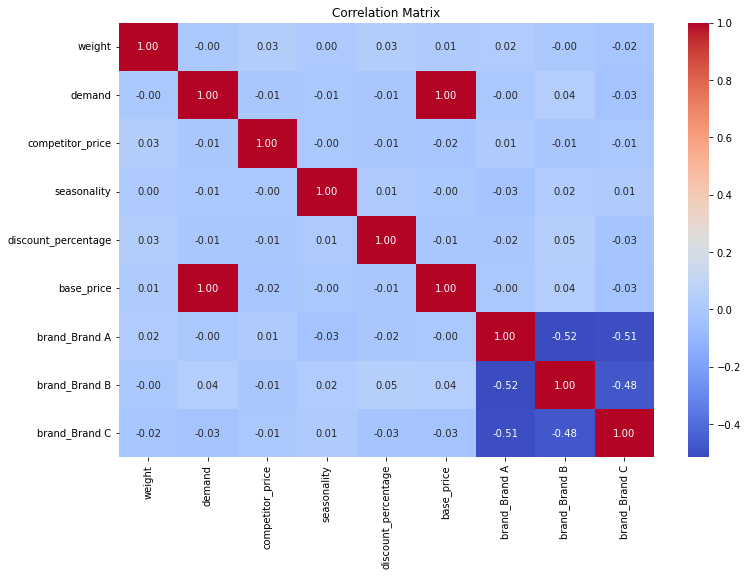

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

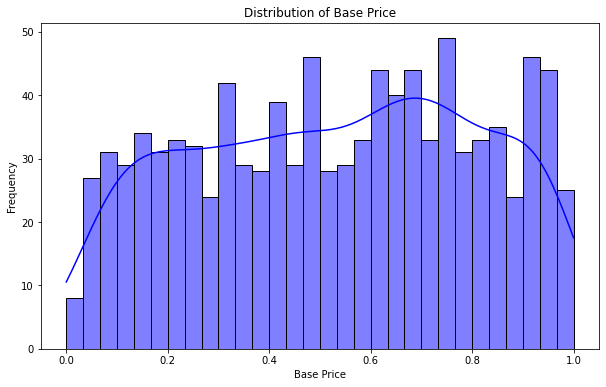

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['base_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Frequency')
plt.show()

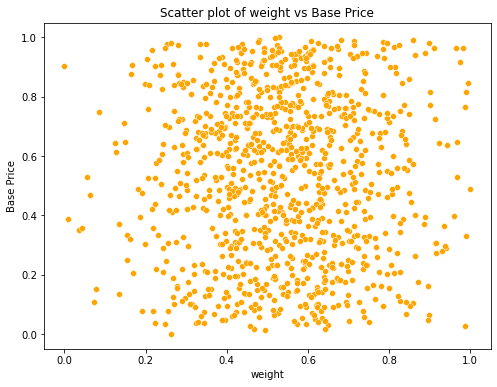

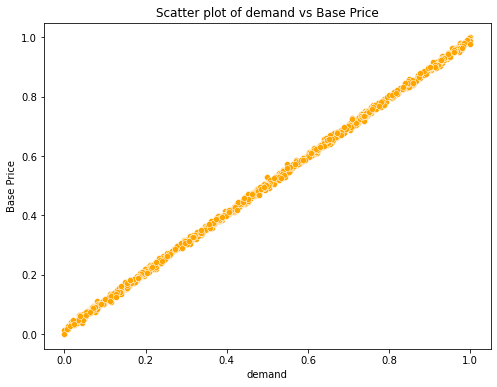

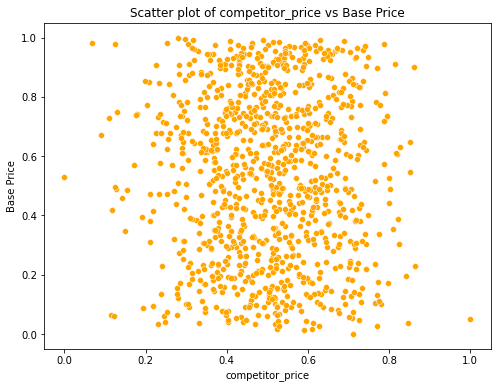

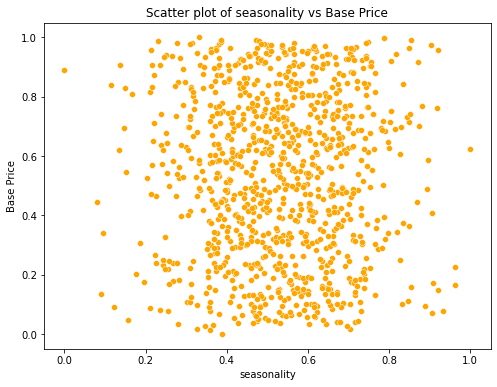

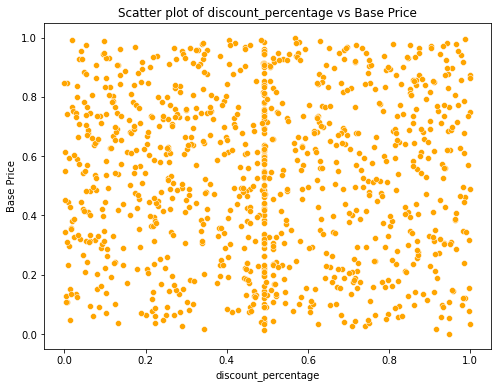

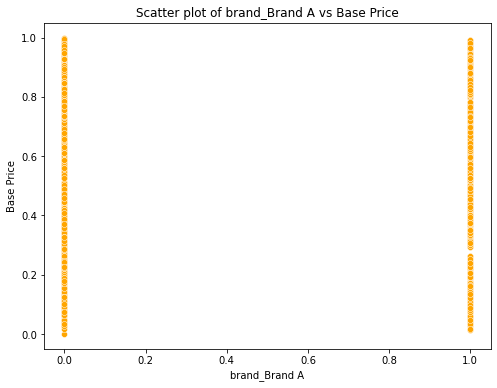

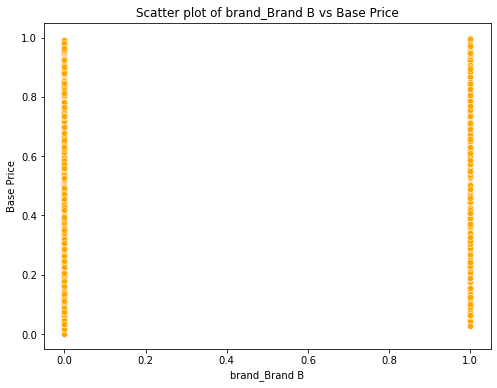

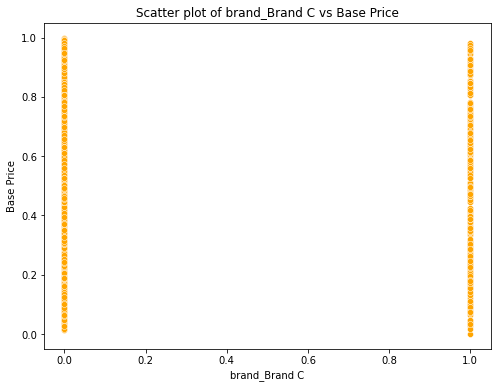

In [48]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('base_price')  # Remove the target variable from numerical features
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='base_price', data=df, color='orange')
    plt.title(f'Scatter plot of {feature} vs Base Price')
    plt.xlabel(feature)
    plt.ylabel('Base Price')
    plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X = df.drop('base_price', axis=1)
y = df['base_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [55]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.071778577063006e-05
